<a href="https://colab.research.google.com/github/SiracencoSerghei/Statistics_and_ML/blob/main/2.8_correlation/stats_corr_cosine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SECTION: Correlation
# Cosine similarity

In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy import spatial

In [27]:
# range of requested correlation coefficients
rs = np.linspace(-1,1,100)

# sample size
N = 500


# initialize output matrix
corrs = np.zeros((len(rs),2))


# loop over a range of r values
for ri in range(len(rs)):

    # generate data
    x = np.random.randn(N)
    y = x*rs[ri] + np.random.randn(N)*np.sqrt(1-rs[ri]**2)

    # optional mean-off-centering
    # x = x+10
    # y = y+10


    # compute correlation
    corrs[ri,0] = np.corrcoef(x,y)[0,1]

    # compute cosine similarity
    cs_num = sum(x*y)
    cs_den = np.sqrt(sum(x*x)) * np.sqrt(sum(y*y))
    corrs[ri,1] = cs_num / cs_den

    # using built-in distance function
    corrs[ri,1] = 1-spatial.distance.cosine(x,y)


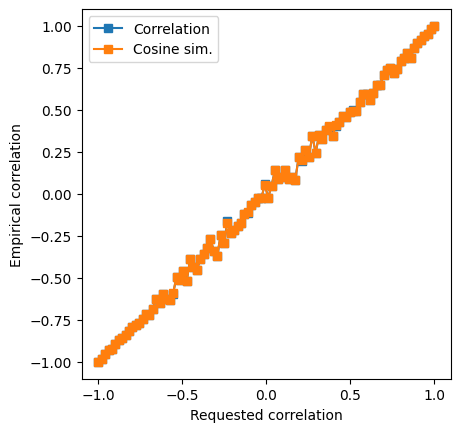

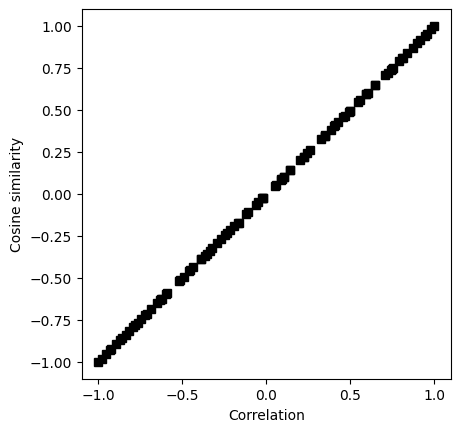

In [29]:
## visualize the results

plt.plot(rs,corrs[:,0],'s-',label='Correlation')
plt.plot(rs,corrs[:,1],'s-',label='Cosine sim.')
plt.legend()
plt.xlabel('Requested correlation')
plt.ylabel('Empirical correlation')
plt.axis('square')
plt.show()


plt.plot(corrs[:,0],corrs[:,1],'ks')
plt.axis('square')
plt.xlabel('Correlation')
plt.ylabel('Cosine similarity')
plt.show()

In [30]:
# their empirical correlation
np.corrcoef(corrs.T)

array([[1.        , 0.99999564],
       [0.99999564, 1.        ]])